In [ ]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
import matplotlib.pyplot as plt
import torch
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [5]:
# fetch dataset 
ecoli = fetch_ucirepo(id=39) 

X, y = ecoli.data.features.to_numpy(), ecoli.data.targets.to_numpy()

X.shape,y.shape

((336, 7), (336, 1))

In [6]:
np.where(y=='cp')[0]

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142],
      dtype=int64)

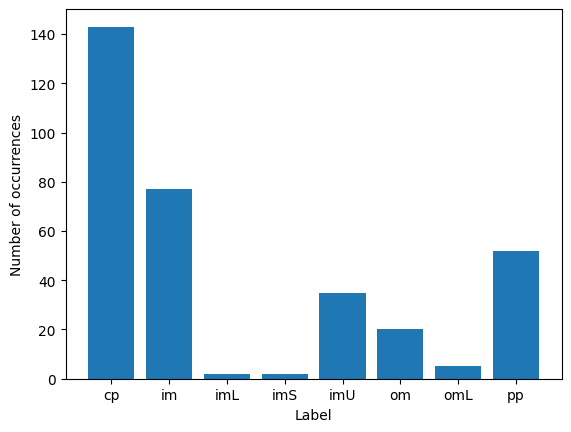

In [13]:
label, occurrences = np.unique(y, return_counts=True)

plt.bar(label, occurrences)
plt.xlabel("Label")
plt.ylabel("Number of occurrences")
plt.show()

As we can gather from the plot, our dataset is pretty imbalanced: some classes (as cp) contain many occurrences, whereas other (imL, imS, omL) contain only a few.

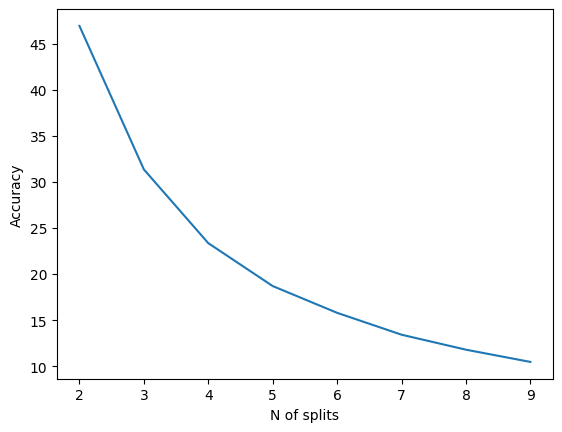

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB

def evaluate(n_splits):
    skf = StratifiedKFold(n_splits, shuffle=True, random_state=42)  #Crear 6 folds a partir de los datos de entrenamiento
    folds = skf.split(X,y)

    accuracies =[]
    for fold, (train_index, test_index) in enumerate(folds):
    # Conjuntos train y test del fold
        model = GaussianNB()
        model.fit(X[train_index],y[train_index])
        y_pred = model.predict(X[test_index])
        score=(y_pred == y[test_index])
        accuracy = np.count_nonzero(score)/len(score)
        accuracies.append(accuracy)

    return np.mean(accuracies)

splits = range(2,10)
results = []
for split in splits:
    results.append(evaluate(split))

plt.plot(splits, results)
plt.xlabel("N of splits")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#MLE
muestras = ecoli.data.features['mcg'][np.where(y=='cp')[0]]
loc_estimation =  (1/len(muestras))*np.sum(muestras)
scale_estimation =  (1/len(muestras))*np.sum((muestras-loc_estimation)**2)

loc_estimation,scale_estimation

(0.3635664335664336, 0.015225742090077755)